Award Amounts - Small Businesses

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Award Amounts Small Businesses.csv')
df

,total_obligated_amount,award_base_action_date_fiscal_year,contracting_officers_determination_of_business_size
0,110418.75,2005,SMALL BUSINESS
1,578579.32,2006,SMALL BUSINESS
2,95135.45,2007,SMALL BUSINESS
3,73340.00,2007,SMALL BUSINESS
4,37410.00,2007,SMALL BUSINESS
...,...,...,...
9431,185130.70,2021,NaN
9432,62597.00,2021,NaN
9433,1492.65,2021,NaN
9434,106500.00,2021,NaN


In [3]:
years = df["award_base_action_date_fiscal_year"].unique()
years

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

In [4]:
list1 = list(years)
list2 = list(df.groupby("award_base_action_date_fiscal_year")["total_obligated_amount"].mean())
condensed_df = pd.DataFrame(zip(list1, list2), columns=["Year", "Average Award Amount"])
condensed_df

,Year,Average Award Amount
0,2005,110418.750000
1,2006,578579.320000
2,2007,150302.881176
3,2008,88671.208205
4,2009,98309.303625
5,2010,75356.272639
6,2011,79439.069017
7,2012,100934.202163
8,2013,130531.795799
9,2014,135932.131744


Text(0.5, 1.0, 'Average Award Amount for Small Businesses Over Time (since 2005)')

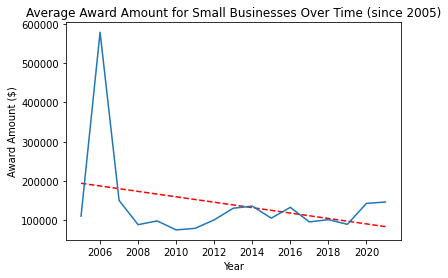

In [5]:
z = np.polyfit(condensed_df["Year"], condensed_df["Average Award Amount"], 1)
p = np.poly1d(z)

plt.plot(condensed_df["Year"], p(condensed_df["Year"]), "r--")
plt.plot(condensed_df["Year"], condensed_df["Average Award Amount"])
plt.xlabel("Year")
plt.ylabel("Award Amount ($)")
plt.title("Average Award Amount for Small Businesses Over Time (since 2005)")

In [6]:
condensed_df_2008_and_beyond = condensed_df[condensed_df["Year"] >= 2008].reset_index(drop=True)
condensed_df_2008_and_beyond

,Year,Average Award Amount
0,2008,88671.208205
1,2009,98309.303625
2,2010,75356.272639
3,2011,79439.069017
4,2012,100934.202163
5,2013,130531.795799
6,2014,135932.131744
7,2015,105291.870969
8,2016,132790.524012
9,2017,95716.856634


Text(0.5, 1.0, 'Average Award Amount for Small Businesses Over Time (since 2008)')

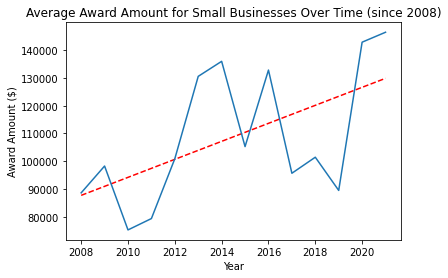

In [7]:
z = np.polyfit(condensed_df_2008_and_beyond["Year"], condensed_df_2008_and_beyond["Average Award Amount"], 1)
p = np.poly1d(z)

plt.plot(condensed_df_2008_and_beyond["Year"], p(condensed_df_2008_and_beyond["Year"]), "r--")
plt.plot(condensed_df_2008_and_beyond["Year"], condensed_df_2008_and_beyond["Average Award Amount"])
plt.xlabel("Year")
plt.ylabel("Award Amount ($)")
plt.title("Average Award Amount for Small Businesses Over Time (since 2008)")

Recipient Types with Award Amounts

In [8]:
df2 = pd.read_csv('Recipient Types.csv')
df2

,award_base_action_date_fiscal_year,veteran_owned_business,woman_owned_business,minority_owned_business
0,2005,t,f,f
1,2006,t,f,t
2,2007,f,t,t
3,2007,f,t,t
4,2007,f,t,f
...,...,...,...,...
9451,2021,t,f,f
9452,2021,t,f,f
9453,2021,t,f,f
9454,2021,t,f,t


In [9]:
condensed_df2 = df2[df2["award_base_action_date_fiscal_year"] >= 2008].reset_index(drop=True)
condensed_df2

,award_base_action_date_fiscal_year,veteran_owned_business,woman_owned_business,minority_owned_business
0,2008,f,t,t
1,2008,t,f,t
2,2008,f,t,f
3,2008,t,f,t
4,2008,f,t,f
...,...,...,...,...
9432,2021,t,f,f
9433,2021,t,f,f
9434,2021,t,f,f
9435,2021,t,f,t


In [10]:
condensed_df2["veteran_owned_business"] = condensed_df2["veteran_owned_business"].astype(str).replace(to_replace=["f", "t"], value=[0, 1])
condensed_df2["woman_owned_business"] = condensed_df2["woman_owned_business"].astype(str).replace(to_replace=["f", "t"], value=[0, 1])
condensed_df2["minority_owned_business"] = condensed_df2["minority_owned_business"].astype(str).replace(to_replace=["f", "t"], value=[0, 1])
condensed_df2

,award_base_action_date_fiscal_year,veteran_owned_business,woman_owned_business,minority_owned_business
0,2008,0,1,1
1,2008,1,0,1
2,2008,0,1,0
3,2008,1,0,1
4,2008,0,1,0
...,...,...,...,...
9432,2021,1,0,0
9433,2021,1,0,0
9434,2021,1,0,0
9435,2021,1,0,1


In [11]:
business_counts = condensed_df2.groupby("award_base_action_date_fiscal_year")[["veteran_owned_business", "woman_owned_business", "minority_owned_business"]].sum().reset_index()
business_counts.rename(columns = {'award_base_action_date_fiscal_year':'Year'}, inplace=True)
business_counts

,Year,veteran_owned_business,woman_owned_business,minority_owned_business
0,2008,69,129,68
1,2009,95,159,85
2,2010,329,437,179
3,2011,355,413,177
4,2012,470,311,131
5,2013,646,548,266
6,2014,750,661,307
7,2015,725,710,277
8,2016,665,705,230
9,2017,435,426,179


In [12]:
df3 = pd.read_csv('Recipient Types with Award Amounts.csv')
df3

,award_base_action_date_fiscal_year,veteran_owned_business,woman_owned_business,minority_owned_business,total_obligated_amount
0,2005,t,f,f,110418.75
1,2006,t,f,t,578579.32
2,2007,f,t,t,95135.45
3,2007,f,t,t,73340.00
4,2007,f,t,f,37410.00
...,...,...,...,...,...
9451,2021,t,f,f,185130.70
9452,2021,t,f,f,62597.00
9453,2021,t,f,f,1492.65
9454,2021,t,f,t,106500.00


In [13]:
condensed_df3 = df3[df3["award_base_action_date_fiscal_year"] >= 2008].reset_index(drop=True)
condensed_df3

,award_base_action_date_fiscal_year,veteran_owned_business,woman_owned_business,minority_owned_business,total_obligated_amount
0,2008,f,t,t,210475.00
1,2008,t,f,t,127092.00
2,2008,f,t,f,72246.00
3,2008,t,f,t,6934.36
4,2008,f,t,f,70.00
...,...,...,...,...,...
9432,2021,t,f,f,185130.70
9433,2021,t,f,f,62597.00
9434,2021,t,f,f,1492.65
9435,2021,t,f,t,106500.00


In [14]:
condensed_df3_veterans = condensed_df3[["award_base_action_date_fiscal_year", "veteran_owned_business", "total_obligated_amount"]]
condensed_df3_women = condensed_df3[["award_base_action_date_fiscal_year", "woman_owned_business", "total_obligated_amount"]]
condensed_df3_minorities = condensed_df3[["award_base_action_date_fiscal_year", "minority_owned_business", "total_obligated_amount"]]

condensed_df3_veterans = condensed_df3_veterans[condensed_df3_veterans["veteran_owned_business"].astype(str) == "t"].reset_index(drop=True)
condensed_df3_women = condensed_df3_women[condensed_df3_women["woman_owned_business"].astype(str) == "t"].reset_index(drop=True)
condensed_df3_minorities = condensed_df3_minorities[condensed_df3_minorities["minority_owned_business"].astype(str) == "t"].reset_index(drop=True)

In [15]:
list1 = list(condensed_df3_veterans["award_base_action_date_fiscal_year"].unique())
list2 = list(condensed_df3_veterans.groupby("award_base_action_date_fiscal_year")["total_obligated_amount"].mean())
veterans_award_amounts = pd.DataFrame(zip(list1, list2), columns=["Year", "Average Award Amount"])
veterans_award_amounts

,Year,Average Award Amount
0,2008,123771.080290
1,2009,147959.689474
2,2010,105550.221064
3,2011,110959.467662
4,2012,93664.371979
5,2013,169894.632601
6,2014,180149.191587
7,2015,136425.291476
8,2016,204077.933263
9,2017,111239.875793


In [16]:
list1 = list(condensed_df3_women["award_base_action_date_fiscal_year"].unique())
list2 = list(condensed_df3_women.groupby("award_base_action_date_fiscal_year")["total_obligated_amount"].mean())
women_award_amounts = pd.DataFrame(zip(list1, list2), columns=["Year", "Average Award Amount"])
women_award_amounts

,Year,Average Award Amount
0,2008,70264.302868
1,2009,69923.604969
2,2010,52547.221259
3,2011,62304.466780
4,2012,98702.866174
5,2013,83905.429562
6,2014,78098.495461
7,2015,71679.435831
8,2016,65370.977929
9,2017,80876.159906


In [17]:
list1 = list(condensed_df3_minorities["award_base_action_date_fiscal_year"].unique())
list2 = list(condensed_df3_minorities.groupby("award_base_action_date_fiscal_year")["total_obligated_amount"].mean())
minorities_award_amounts = pd.DataFrame(zip(list1, list2), columns=["Year", "Average Award Amount"])
minorities_award_amounts

,Year,Average Award Amount
0,2008,140324.541324
1,2009,87916.942118
2,2010,97954.179721
3,2011,100129.831356
4,2012,134387.084962
5,2013,285263.190865
6,2014,260803.019739
7,2015,175642.577437
8,2016,153697.629391
9,2017,60463.608324


Text(0.5, 1.0, 'Recipient Types Drilled Down (2008-2021)')

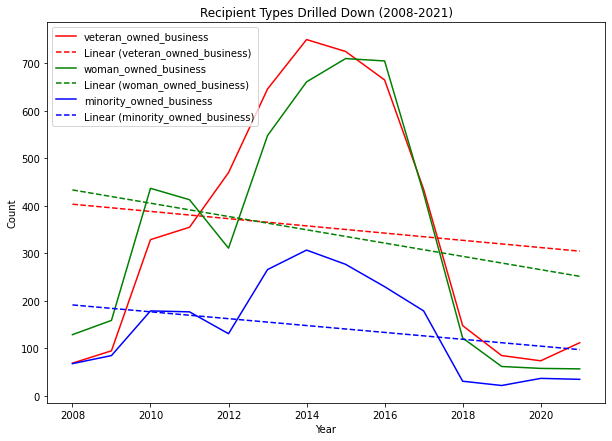

In [18]:
z = np.polyfit(business_counts["Year"], business_counts["veteran_owned_business"], 1)
p = np.poly1d(z)

z2 = np.polyfit(business_counts["Year"], business_counts["woman_owned_business"], 1)
p2 = np.poly1d(z2)

z3 = np.polyfit(business_counts["Year"], business_counts["minority_owned_business"], 1)
p3 = np.poly1d(z3)

plt.figure(figsize=(10,7))
plt.plot(business_counts["Year"], business_counts["veteran_owned_business"], color="r", label="veteran_owned_business")
plt.plot(business_counts["Year"], p(business_counts["Year"]), "r--", label="Linear (veteran_owned_business)")
plt.plot(business_counts["Year"], business_counts["woman_owned_business"], color="g", label="woman_owned_business")
plt.plot(business_counts["Year"], p2(business_counts["Year"]), "g--", label="Linear (woman_owned_business)")
plt.plot(business_counts["Year"], business_counts["minority_owned_business"], color="b", label="minority_owned_business")
plt.plot(business_counts["Year"], p3(business_counts["Year"]), "b--", label="Linear (minority_owned_business)")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Recipient Types Drilled Down (2008-2021)")

Text(0.5, 1.0, 'Veteran-Owned Businesses (2008-2021)')

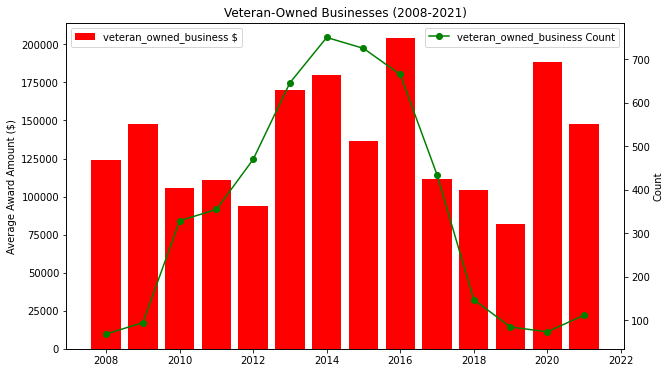

In [19]:
plt.figure(figsize=(10,6))
veteran_award_amounts = plt.bar(veterans_award_amounts["Year"], veterans_award_amounts["Average Award Amount"], color="r", label="veteran_owned_business $")
plt.ylabel("Average Award Amount ($)")
plt.legend(loc="upper left")

plt.twinx()
veteran_counts = plt.plot(business_counts["Year"], business_counts["veteran_owned_business"], "o-", color="g", label="veteran_owned_business Count")
plt.ylabel("Count")
plt.legend()

plt.title("Veteran-Owned Businesses (2008-2021)")

Text(0.5, 1.0, 'Women-Owned Businesses (2008-2021)')

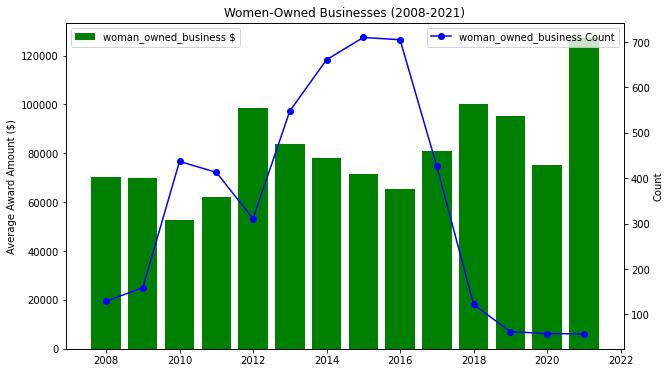

In [20]:
plt.figure(figsize=(10,6))
women_award_amounts = plt.bar(women_award_amounts["Year"], women_award_amounts["Average Award Amount"], color="g", label="woman_owned_business $")
plt.ylabel("Average Award Amount ($)")
plt.legend(loc="upper left")

plt.twinx()
women_counts = plt.plot(business_counts["Year"], business_counts["woman_owned_business"], "o-", color="b", label="woman_owned_business Count")
plt.ylabel("Count")
plt.legend()

plt.title("Women-Owned Businesses (2008-2021)")

Text(0.5, 1.0, 'Minority-Owned Businesses (2008-2021)')

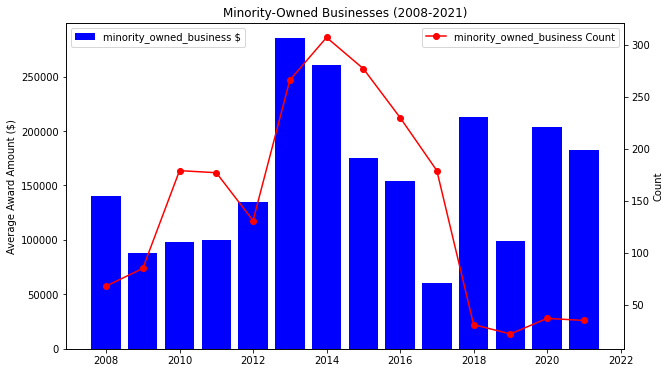

In [21]:
plt.figure(figsize=(10,6))
minority_award_amounts = plt.bar(minorities_award_amounts["Year"], minorities_award_amounts["Average Award Amount"], color="b", label="minority_owned_business $")
plt.ylabel("Average Award Amount ($)")
plt.legend(loc="upper left")

plt.twinx()
minority_counts = plt.plot(business_counts["Year"], business_counts["minority_owned_business"], "o-", color="r", label="minority_owned_business Count")
plt.ylabel("Count")
plt.legend()

plt.title("Minority-Owned Businesses (2008-2021)")